# Import data

In [14]:
import pandas as pd
import seaborn as sns
sns.set()

df = pd.read_csv('../Covoid/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'Country/Region':'Country'}, inplace=True)
df


,SNo,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11336,11337,03/23/2020,NaN,Uzbekistan,2020-03-23 23:19:21,46.0,0.0,0.0
11337,11338,03/23/2020,NaN,Venezuela,2020-03-23 23:19:21,77.0,0.0,15.0
11338,11339,03/23/2020,NaN,Vietnam,2020-03-23 23:19:21,123.0,0.0,17.0
11339,11340,03/23/2020,NaN,Zambia,2020-03-23 23:19:21,3.0,0.0,0.0


In [15]:
df_confirmed= pd.read_csv('../Covoid/time_series_covid_19_confirmed.csv')

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)

df_confirmed 

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [16]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

df_latlong.rename(columns={'ObservationDate':'Date'}, inplace=True)
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,1,01/22/2020,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0,31.8257,117.2264
1,39,01/23/2020,Anhui,China,2020-01-23 17:00:00,9.0,0.0,0.0,31.8257,117.2264
2,96,01/24/2020,Anhui,China,2020-01-24 17:00:00,15.0,0.0,0.0,31.8257,117.2264
3,132,01/25/2020,Anhui,China,2020-01-25 17:00:00,39.0,0.0,0.0,31.8257,117.2264
4,177,01/26/2020,Anhui,China,2020-01-26 16:00:00,60.0,0.0,0.0,31.8257,117.2264
...,...,...,...,...,...,...,...,...,...,...
10250,11282,03/23/2020,NaN,Mozambique,2020-03-23 23:19:21,1.0,0.0,0.0,-18.6657,35.5296
10251,7907,03/22/2020,NaN,Syria,2020-03-22 22:43:03,1.0,0.0,0.0,34.8021,38.9968
10252,11323,03/23/2020,NaN,Syria,2020-03-23 23:19:21,1.0,0.0,0.0,34.8021,38.9968
10253,7908,03/22/2020,NaN,Timor-Leste,2020-03-22 01:43:03,1.0,0.0,0.0,-8.8742,125.7275


## Make tunisian data

In [17]:
df_TN = df_latlong.query('Country in ["Tunisia"]')
 
df_TN

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long
5150,3376,03/04/2020,NaN,Tunisia,2020-03-04 01:33:07,1.0,0.0,0.0,34.0,9.0
5151,3544,03/05/2020,NaN,Tunisia,2020-03-04 01:33:07,1.0,0.0,0.0,34.0,9.0
5152,3733,03/06/2020,NaN,Tunisia,2020-03-04 01:33:07,1.0,0.0,0.0,34.0,9.0
5153,3948,03/07/2020,NaN,Tunisia,2020-03-04 01:33:07,1.0,0.0,0.0,34.0,9.0
5154,4149,03/08/2020,NaN,Tunisia,2020-03-08 21:13:10,2.0,0.0,0.0,34.0,9.0
5155,4413,03/09/2020,NaN,Tunisia,2020-03-08 21:13:10,2.0,0.0,0.0,34.0,9.0
5156,4652,03/10/2020,NaN,Tunisia,2020-03-10 05:13:07,5.0,0.0,0.0,34.0,9.0
5157,4859,03/11/2020,NaN,Tunisia,2020-03-11 18:52:03,7.0,0.0,0.0,34.0,9.0
5158,5081,03/12/2020,NaN,Tunisia,2020-03-11 18:52:03,7.0,0.0,0.0,34.0,9.0
5159,5324,03/13/2020,NaN,Tunisia,2020-03-11 20:00:00,16.0,0.0,0.0,34.0,9.0


# Visualisation de la data 

## Pour la tunisie

In [18]:
import plotly.graph_objects as go
fig = go.Figure()
confirmed=df_TN
deaths=df_TN
recovered=df_TN
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
 

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()

## Dans le monde 

In [20]:
 df=df_latlong
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,1,01/22/2020,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0,31.8257,117.2264
1,39,01/23/2020,Anhui,China,2020-01-23 17:00:00,9.0,0.0,0.0,31.8257,117.2264
2,96,01/24/2020,Anhui,China,2020-01-24 17:00:00,15.0,0.0,0.0,31.8257,117.2264
3,132,01/25/2020,Anhui,China,2020-01-25 17:00:00,39.0,0.0,0.0,31.8257,117.2264
4,177,01/26/2020,Anhui,China,2020-01-26 16:00:00,60.0,0.0,0.0,31.8257,117.2264
...,...,...,...,...,...,...,...,...,...,...
10250,11282,03/23/2020,NaN,Mozambique,2020-03-23 23:19:21,1.0,0.0,0.0,-18.6657,35.5296
10251,7907,03/22/2020,NaN,Syria,2020-03-22 22:43:03,1.0,0.0,0.0,34.8021,38.9968
10252,11323,03/23/2020,NaN,Syria,2020-03-23 23:19:21,1.0,0.0,0.0,34.8021,38.9968
10253,7908,03/22/2020,NaN,Timor-Leste,2020-03-22 01:43:03,1.0,0.0,0.0,-8.8742,125.7275


In [21]:
import plotly.express as px
fig = px.density_mapbox(df, 

                        lat="Lat", 
                        lon="Long", 
                        hover_name="Country", 
                         z="Confirmed",
                        
                        animation_frame=df["Date"],
                       
                        radius=7, 
                        zoom=0,height=700,range_color= [10, 20])
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.update(layout_coloraxis_showscale=False)
fig.show()

## Forcasting

In [22]:
from fbprophet import Prophet

In [23]:
Confirme = df_TN.loc[:,['Date','Confirmed']]
df_1 = pd.DataFrame(Confirme)
df_1.columns = ['ds', 'y']
df_1

,ds,y
5150,03/04/2020,1.0
5151,03/05/2020,1.0
5152,03/06/2020,1.0
5153,03/07/2020,1.0
5154,03/08/2020,2.0
5155,03/09/2020,2.0
5156,03/10/2020,5.0
5157,03/11/2020,7.0
5158,03/12/2020,7.0
5159,03/13/2020,16.0


In [24]:
m = Prophet(interval_width=0.95)
m.fit(df_1)
future = m.make_future_dataframe(periods=7)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


,ds
22,2020-03-26
23,2020-03-27
24,2020-03-28
25,2020-03-29
26,2020-03-30


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
22,2020-03-26,71.331806,52.163170,92.539546
23,2020-03-27,79.335574,58.213408,98.541743
24,2020-03-28,82.006462,62.109660,101.831803
25,2020-03-29,87.344303,66.966595,108.340368
26,2020-03-30,92.682142,73.652258,114.211790


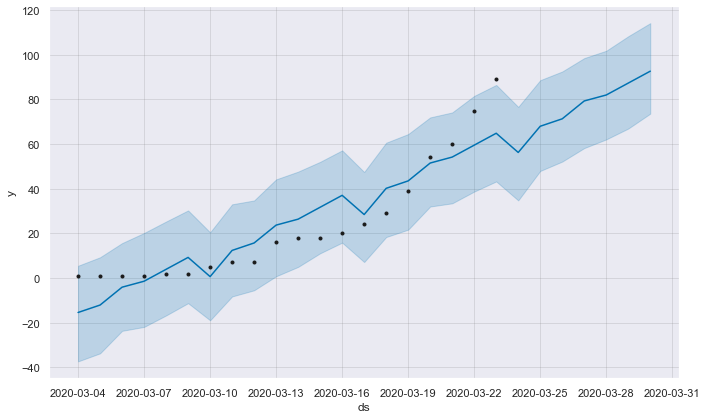

In [26]:
confirmed_forecast_plot = m.plot(forecast)

# Part 2

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn')
%matplotlib inline 

In [158]:
df_confirmed= pd.read_csv('../Covoid/time_series_covid_19_confirmed.csv')
df_deaths= pd.read_csv('../Covoid/time_series_covid_19_deaths.csv')
df_recovered= pd.read_csv('../Covoid/time_series_covid_19_recovered.csv')
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_confirmed.head() 

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [120]:
cols = df_confirmed.keys()

In [121]:
confirmed =df_confirmed.loc[:, cols[4]:cols[-2]]
deaths = df_deaths.loc[:, cols[4]:cols[-2]]
recoveries = df_recovered.loc[:, cols[4]:cols[-2]]


In [122]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
Tunisia_cases = [] 


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    Tunisia_cases.append(df_confirmed[df_confirmed['Country']=='Tunisia'][i].sum())
    

In [123]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

future forecasting

In [172]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [173]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [178]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[40:61],  Tunisia_cases[40:61], test_size=0.15, shuffle=False) 

array([33.9249597 , 38.49805976, 43.48285246, 48.90846886])

In [189]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=6, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast[40:61])

MAE: 15.796414805164204
MSE: 304.9125863772341


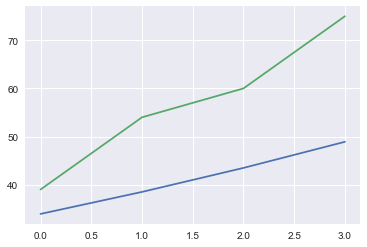

In [190]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [181]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)


In [182]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 5.1326966339256614
MSE: 38.521942821764966


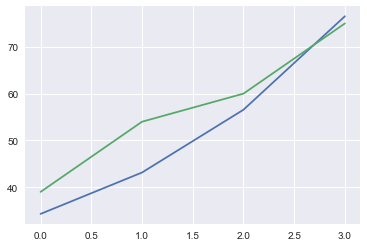

In [183]:
plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)

In [184]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.1s finished
C:\Users\asus\.cache\Nouveau dossier\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e

In [185]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 15.320348964454455
MSE: 280.5619794212033


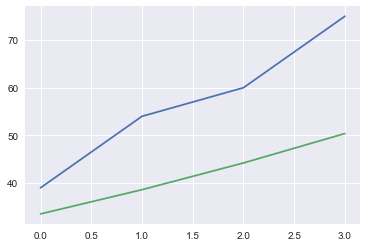

In [186]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)

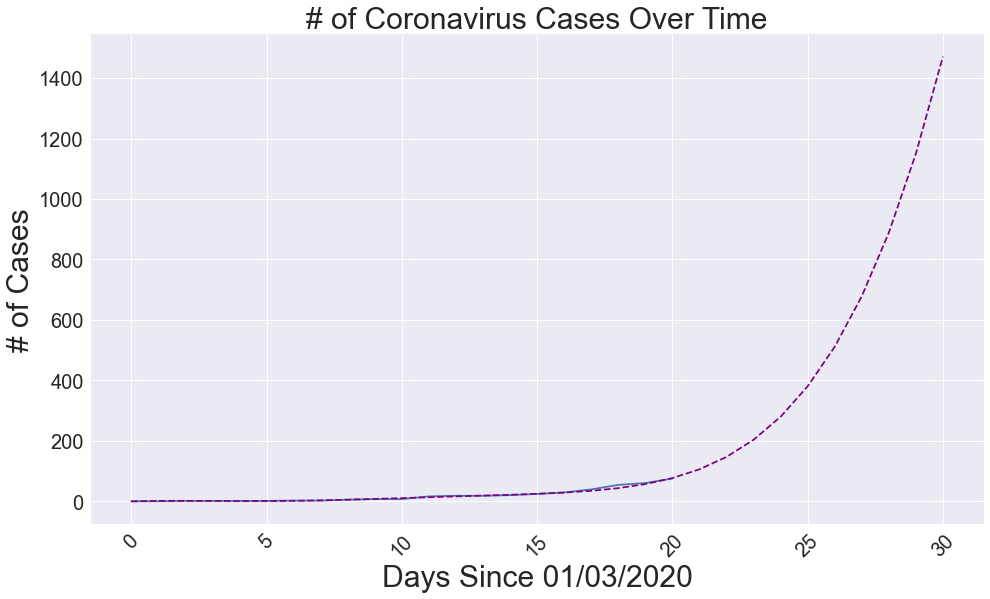

In [217]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates[0:21], Tunisia_cases[40:61])
plt.plot(future_forcast[0:31], linear_pred[40:71] , linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 01/03/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(rotation=45)
plt.show()

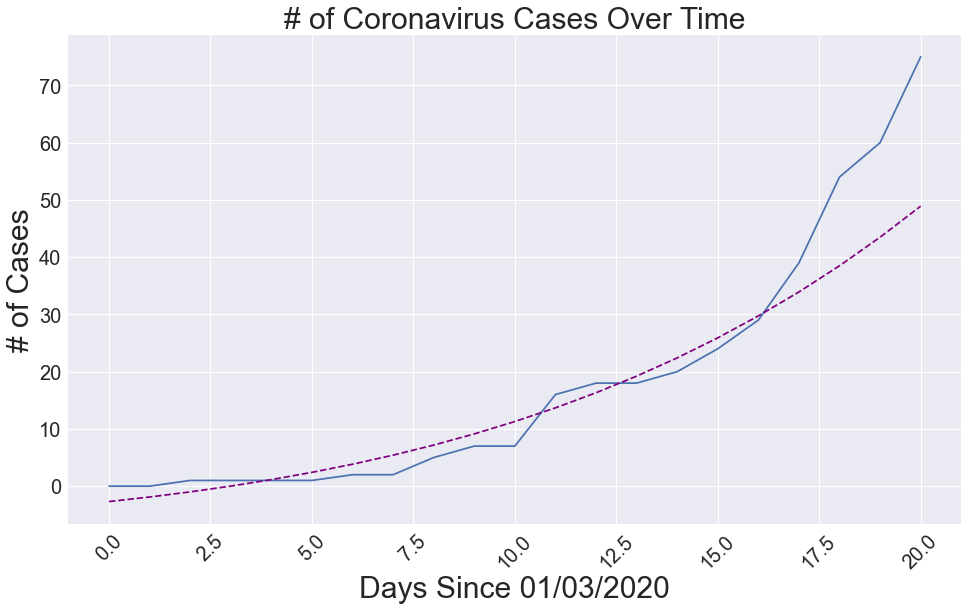

In [219]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates[0:21], Tunisia_cases[40:61])
plt.plot(future_forcast[0:21], svm_pred , linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 01/03/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(rotation=45)
plt.show()

In [168]:
test_bayesian_pred

array([ 8.73602524, 10.64377081, 12.83444312, 15.33581263, 18.1772986 ,
       21.39001438, 25.00681265, 29.06233071, 33.59303575, 38.63727013])

In [207]:
len(linear_pred )

71